# Carregando os dados

In [1]:
import pandas as pd
df = pd.read_feather('credit_scoring.ftr')

In [2]:
df.shape

(750000, 15)

In [3]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [4]:
dataset = df.sample(40000)

In [5]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [6]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)


In [7]:
from pycaret.classification import *

# Alterando os dados de treino

In [8]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
mau                         bool
dtype: object

In [9]:
#forçando a variável qnt de filhos como numérica
data.qtd_filhos = data.qtd_filhos.astype(float)

In [10]:
data.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
qtd_filhos,1.000000,-0.365139,-0.067438,0.892861,-0.039061,0.009052
idade,-0.365139,1.000000,0.323593,-0.339707,0.100632,-0.029305
tempo_emprego,-0.067438,0.323593,1.000000,-0.059656,0.506047,-0.131844
qt_pessoas_residencia,0.892861,-0.339707,-0.059656,1.000000,-0.045924,0.008480
renda,-0.039061,0.100632,0.506047,-0.045924,1.000000,-0.069326
mau,0.009052,-0.029305,-0.131844,0.008480,-0.069326,1.000000


In [16]:
data.mau.value_counts(normalize=True)

False    0.919342
True     0.080658
Name: mau, dtype: float64

In [17]:
exp_aula4 = setup(data = data, target = 'mau', experiment_name='credit_1',
                  normalize=True, normalize_method='zscore', 
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)



,Description,Value
0,Session id,4660
1,Target,mau
2,Target type,Binary
3,Original data shape,"(38000, 13)"
4,Transformed data shape,"(60308, 30)"
5,Transformed train set shape,"(48908, 30)"
6,Transformed test set shape,"(11400, 30)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,7


In [18]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9147,0.7634,0.0927,0.3829,0.1493,0.1216,0.1566,3.4075
lightgbm,Light Gradient Boosting Machine,0.9165,0.7624,0.0760,0.4055,0.1279,0.1052,0.1477,0.7400
ada,Ada Boost Classifier,0.9049,0.7513,0.1584,0.3172,0.2111,0.1667,0.1782,1.1725
lr,Logistic Regression,0.8958,0.7466,0.2279,0.3047,0.2605,0.2058,0.2084,1.2050
lda,Linear Discriminant Analysis,0.8870,0.7277,0.2456,0.2754,0.2595,0.1985,0.1990,0.4475
rf,Random Forest Classifier,0.8980,0.6932,0.1216,0.2398,0.1614,0.1132,0.1206,1.0900
et,Extra Trees Classifier,0.8828,0.6485,0.1328,0.1847,0.1545,0.0933,0.0948,1.0700
nb,Naive Bayes,0.5702,0.6388,0.5901,0.1257,0.1984,0.0784,0.0996,0.4750
qda,Quadratic Discriminant Analysis,0.9191,0.5938,0.0000,0.0000,0.0000,-0.0004,-0.0035,0.3725
dt,Decision Tree Classifier,0.8606,0.5573,0.1841,0.1678,0.1755,0.0996,0.0997,0.4175


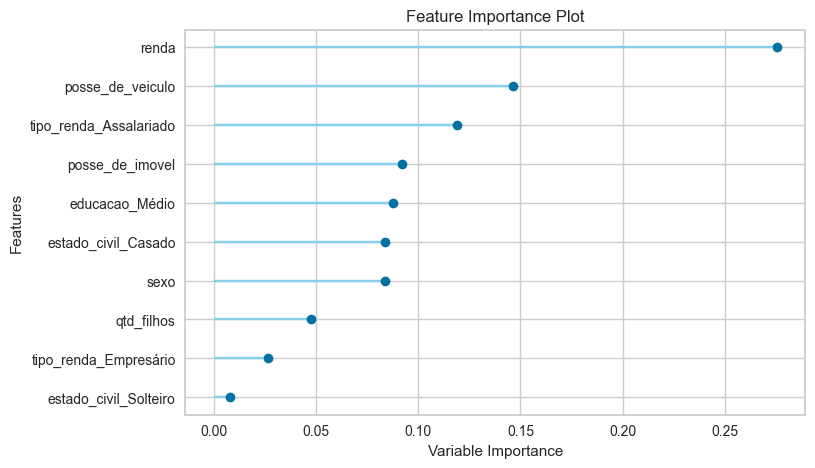

In [20]:
plot_model(best_model, plot='feature')

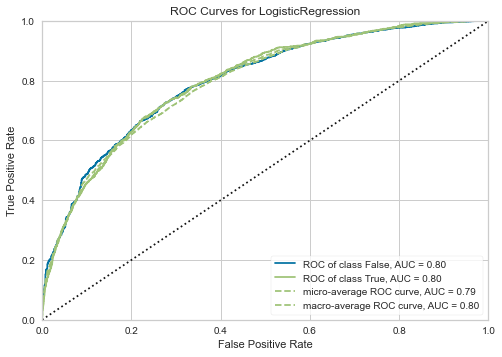

In [15]:
plot_model(best_model, plot='auc')

In [21]:
save_model(best_model,'LR Model Aula 5 062022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\mardo\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categorical...
                                             criterion='friedman_mse', init=None,
                       

In [22]:
model_saved = load_model('LR Model Aula 5 062022')

Transformation Pipeline and Model Successfully Loaded


In [23]:
model_saved.named_steps

{'numerical_imputer': TransformerWrapper(exclude=None,
                    include=['qtd_filhos', 'idade', 'tempo_emprego',
                             'qt_pessoas_residencia', 'renda'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              missing_values=nan,
                                              strategy='mean', verbose=0)),
 'categorical_imputer': TransformerWrapper(exclude=None,
                    include=['sexo', 'posse_de_veiculo', 'posse_de_imovel',
                             'tipo_renda', 'educacao', 'estado_civil',
                             'tipo_residencia'],
                    transformer=SimpleImputer(add_indicator=False, copy=True,
                                              fill_value=None,
                                              missing_values=nan,
                                              strategy='most_frequent

In [24]:
exp_aula4 = setup(data = data, target = 'mau',
                  normalize = True, 
                  transformation = True, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'])

,Description,Value
0,Session id,5369
1,Target,mau
2,Target type,Binary
3,Original data shape,"(38000, 13)"
4,Transformed data shape,"(38000, 30)"
5,Transformed train set shape,"(26600, 30)"
6,Transformed test set shape,"(11400, 30)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,7
